In [20]:
import os
import ipywidgets.widgets as wgt
from ipywidgets import interact
import pyfas as fa
import pandas as pd

---

# Survival miniguide

<i>To execute a cell:</i>

> SHIFT+ENTER (per cell)

or 

> Cell --> Run All from the toolbar above

<img  src="run_all.png"/>

<i><H7>To insert an empty cell press ESC+</H7></i>
> b (to insert below)  
> a (to insert above) 

---

# Ppl files, examples and howto

For an tpl file the following methods are available:

* <b>filter_profiles</b> - return a filtered subset of trends
* <b>extract</b> - extract a single trend variable
* <b>to_excel</b> - dump all the data to an excel file

The usual workflow should be:

1. Load the correct ppl
2. Filter the desired variable(s)
3. Extract the selected variable(s) or dump all the variables to an excel file
4. Post-process your data in Excel or in the notebook itself

---

## File loading

To load a tpl the corresponding filename have to be copied and pasted on the text are below.  
  
The dafault value used fro the eamples is <i>FC1_rev01.tpl</i> bur you are free to use a different file (the file path must be specified too)

In [3]:
# Path text widget
path_wdt = wgt.Text(description="Path", value="../pyfas/test" )
path_wdt

To change the working folder is also possible to use the command cd like in a shell:
> cd /path_to_your/working_folder/

In [4]:
# Filename text widget
fname_wdt = wgt.Text(description="Filename", value=r"FC1_rev01.ppl" )
fname_wdt

In [5]:
path = path_wdt.value
fobj = fname_wdt.value
ppl = fa.Ppl(path + os.sep + fobj)

---

## Profile selection

A ppl file can contain hundreds of profiles, in particular for complex networks. For this reason it may be of interest to filter the interesting variables to be processed. 

The easiest way to filter all the profiles with a specific pattern is the command:

> ppl.filter_profiles("PT")

This will filter all the pressure profiles (or better, all the profiles with "PT" in the description, if you have defined a temperature profile in the branch "PTOPSIDE", for example, this profile will be selected too).

The resulting python dictionaly will have a unique index (like a key for a database system) for each filtered trend that can be used to identify the interesting trend(s).

If you change the pattern in the text area below you can filter different types of trends. If you leave it blank all the avaialbe trends will be showed.

In [6]:
# Variable text widget
var_wdt = wgt.Text(description="Variable", value="PT" )
var_wdt

In [7]:
# variables filtering 
var_show_wdt = wgt.Button(description="Show filtered trends", value=False)

def on_button_clicked(b):
    myvars = ppl.filter_profiles(var_wdt.value)
    [print(idx, var.replace("\n", "")) for idx, var in zip(myvars.keys(), myvars.values())]

var_show_wdt.on_click(on_button_clicked)
var_show_wdt

The same but just a bit nicer:

In [8]:
pd.DataFrame(ppl.filter_profiles(var_wdt.value), index=("Profiles",)).T

,Profiles
4,PT 'SECTION:' 'BRANCH:' 'old_offshore' '(PA)' ...
12,PT 'SECTION:' 'BRANCH:' 'riser' '(PA)' 'Pressu...
20,PT 'SECTION:' 'BRANCH:' 'new_offshore' '(PA)' ...
28,PT 'SECTION:' 'BRANCH:' 'to_vent' '(PA)' 'Pres...
36,PT 'SECTION:' 'BRANCH:' 'dry' '(PA)' 'Pressure'\n
44,PT 'SECTION:' 'BRANCH:' 'tiein_spool' '(PA)' '...


---

## Dump to excel

If no path is provided, an excel file called like the tpl file will be created in the working folder. Depending on the tpl size this may take a while.

In [9]:
# Excel path
xl_path_wdt = wgt.Text(description="Excel path", value="" )
xl_path_wdt

Click on the button below to generate the excel file

In [10]:
# Excel fname
xl_button_wdt = wgt.Button(description="To Excel", value=False)

def on_button_clicked(b):
    ppl.to_excel(xl_path_wdt.value)
    print("Completed.")

xl_button_wdt.on_click(on_button_clicked)
xl_button_wdt

Completed.
Completed.
Completed.


---

## Extract a specific variable

> N.B. This section of the notebook does not use interactive widgets, thus some python knowledge is required to manipulate variables or plot options.

Once you know the variable(s) index you are interested in (see the filtering paragraph above for more info) you can also extract it (or them) and use the data directly in the notebook. To postporcess here the results some python knowlwedge is required. 

Let's assume you are interested in the inlet pressure and the outlet temperature:

In [12]:
pd.DataFrame(ppl.filter_profiles("TM"), index=("Profiles",)).T

,Profiles
5,TM 'SECTION:' 'BRANCH:' 'old_offshore' '(C)' '...
13,TM 'SECTION:' 'BRANCH:' 'riser' '(C)' 'Fluid t...
21,TM 'SECTION:' 'BRANCH:' 'new_offshore' '(C)' '...
29,TM 'SECTION:' 'BRANCH:' 'to_vent' '(C)' 'Fluid...
37,TM 'SECTION:' 'BRANCH:' 'dry' '(C)' 'Fluid tem...
45,TM 'SECTION:' 'BRANCH:' 'tiein_spool' '(C)' 'F...


In [13]:
pd.DataFrame(ppl.filter_profiles("PT"), index=("Profiles",)).T

,Profiles
4,PT 'SECTION:' 'BRANCH:' 'old_offshore' '(PA)' ...
12,PT 'SECTION:' 'BRANCH:' 'riser' '(PA)' 'Pressu...
20,PT 'SECTION:' 'BRANCH:' 'new_offshore' '(PA)' ...
28,PT 'SECTION:' 'BRANCH:' 'to_vent' '(PA)' 'Pres...
36,PT 'SECTION:' 'BRANCH:' 'dry' '(PA)' 'Pressure'\n
44,PT 'SECTION:' 'BRANCH:' 'tiein_spool' '(PA)' '...


Our targets are:

> <b>variable 5</b> - TM 'SECTION:' 'BRANCH:' 'old_offshore' '(C)'   

and  

> <b>variable 4</b> - PT 'SECTION:' 'BRANCH:' 'old_offshore' '(PA)'  

In [14]:
# Extraction
ppl.extract(5)
ppl.extract(4)

Now the tpl attribute "data" contains our data, let's plot it:

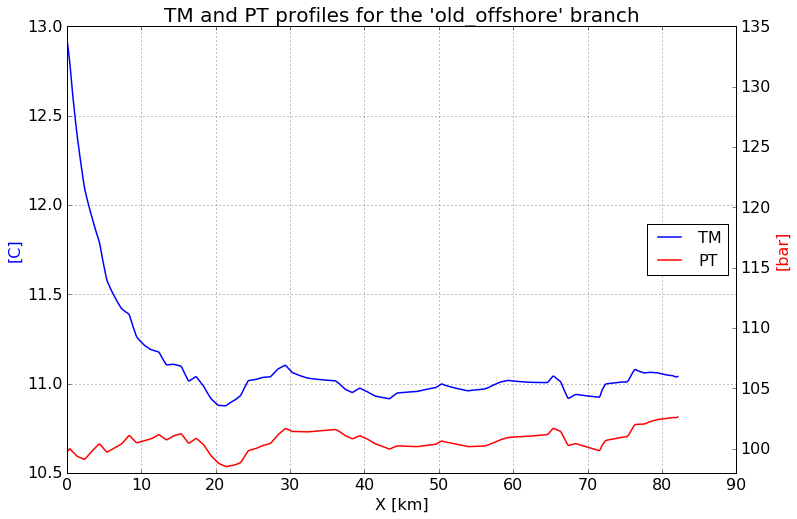

In [42]:
@interact
def myppl_plot(ts=wgt.IntSlider(min=0, max=len(ppl.data[5][1])-1)):
    %matplotlib inline 
    fig, ax1 = plt.subplots(figsize=(12, 8));
    p0, = ax1.plot(ppl.data[5][0]/1e3, ppl.data[5][1][ts])
    ax1.set_ylim(10.5, 13)
    ax1.set_xlabel("X [km]", fontsize=16)
    ax1.set_ylabel("[C]", color='b', fontsize=16)
    
    ax2 = ax1.twinx()
    ax2.grid(False)
    p1, = ax2.plot(ppl.data[4][0]/1e3, ppl.data[4][1][ts]/1e5, 'r')
    ax2.set_ylim(98, 135)  
    ax2.set_ylabel("[bar]", color='r', fontsize=16)
    
    plt.legend((p0, p1), ("TM", "PT"), loc=7)
    
    ax1.tick_params(axis="both", labelsize=16)
    ax2.tick_params(axis="both", labelsize=16)
    
    plt.title("TM and PT profiles for the 'old_offshore' branch", size=20)


---